<a href="https://colab.research.google.com/github/nek07/fruits-vegetables-cnn/blob/main/abylay_negr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMPUTER VISION<br>
ASSIGNMENT 2<br>
Submission due date: 6th November 2024<br>
Submission due time: 23:59<br>
Presentation date: 7th – 8th November 2024<br>
General guidelines<br>
This is a group assignment (max 2 student per group). You are allowed to use any previously<br>
written source for your research on the topic. However, any source other than the textbook and the
class notes should be cited and the bibliographic information should be given.
Submission format
Please, submit py or ipybn file. Mention your name and surname.
Example: Name1_Surname1_Name2_Surname2_Assignment1.py
Dataset
For this assignment you will use Fruits and Vegetables Image Recognition <br>Dataset:<br>
https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition<br>
Tasks to do:
1. Load and preprocess the given dataset.
2. Implement a CNN with proper architecture. Describe your implementation and explain
why you choose such architecture.
3. Apply Data Augmentation methods on your dataset. Describe your implementation and
explain why you choose such method.
4. Merge original and augmented data.
5. Implement a CNN with proper architecture (Fully Connected Layers, Convolution
Layers, Pooling Layers etc.). Describe your implementation and explain why you choose
such architecture.
6. Implement various architectures with different activations functions (ReLU, Leaky
ReLU, ELU). Describe your implementation for each activation function.
7. Initialize your weights with different methods (Small random numbers, Xavier,
Kaiming/MSRA). Describe your implementation for each method.
8. Apply different regularization methods (L1, L2, Dropout, Batch normalization). Describe
your implementation for each method.
9. Describe, compare, and visualize your results.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data sets**

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/augdata/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)



Found 3115 files belonging to 36 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruitsdata/validation',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)



Found 351 files belonging to 36 classes.


In [5]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/augdata/train'  ,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)



Found 3115 files belonging to 36 classes.


# **Data Augmentation**

In [6]:
aug_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range= 0.2,
    channel_shift_range=90,
    fill_mode='nearest',
    horizontal_flip = True)

Test data augmentation

/content/drive/MyDrive/fruitsdata/train/apple/Image_87.jpg


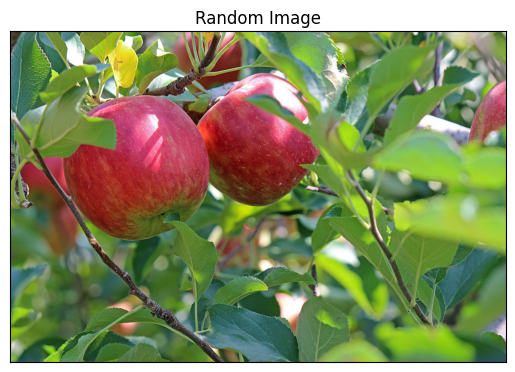

In [7]:
random_dir = random.choice(os.listdir('/content/drive/MyDrive/fruitsdata/train'))
random_image = random.choice(os.listdir(os.path.join('/content/drive/MyDrive/fruitsdata/train', random_dir)))
image_path = '/content/drive/MyDrive/fruitsdata/train/' + random_dir + "/" +   random_image
print(image_path)
img = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(img[0])
plt.title('Random Image')
plt.xticks([])
plt.yticks([])
plt.show()

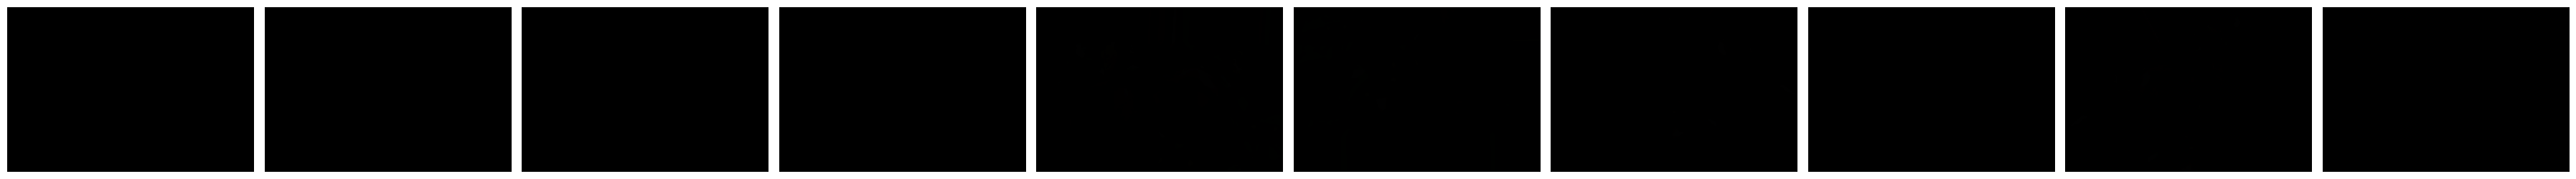

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(36,36))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

aug_iter = aug_gen.flow(img)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plotImages(aug_images)




In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Параметры
train_dir = '/content/drive/MyDrive/fruitsdata/train'
output_dir = '/content/drive/MyDrive/augdata/train'
batch_size = 1  # Чтобы обрабатывать одно изображение за раз
image_size = (64, 64)
augmentations_per_image = 1  # Только одно аугментированное изображение для каждого оригинала

# Убедимся, что выходная директория существует
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Создаем генератор данных с аугментацией
aug_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Загружаем изображения из оригинальной директории
original_gen = ImageDataGenerator(rescale=1.0/255)
original_data = original_gen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Отключаем перемешивание для сохранения порядка
)

# Применение аугментации и сохранение изображений
for class_index, class_name in enumerate(original_data.class_indices.keys()):
    # Создаем папку для каждого класса
    class_folder = os.path.join(output_dir, class_name)
    os.makedirs(class_folder, exist_ok=True)

    # Генерация изображений для данного класса
    for i in range(len(original_data.filepaths)):
        img_path = original_data.filepaths[i]
        img_class = original_data.classes[i]  # Получаем класс текущего изображения

        # Если изображение не относится к текущему классу, пропускаем его
        if img_class != class_index:
            continue

        img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Добавляем ось для batch

        # Сохраняем оригинал
        original_filename = os.path.basename(img_path)
        img.save(os.path.join(class_folder, f"original_{i}_{original_filename}"))

        # Генерируем только одно аугментированное изображение
        aug_iter = aug_gen.flow(img_array, batch_size=1)
        aug_img = next(aug_iter)[0]
        aug_img = tf.keras.preprocessing.image.array_to_img(aug_img)
        aug_img.save(os.path.join(class_folder, f"aug_{i}_{original_filename}"))

        # Выводим информацию о количестве сгенерированных изображений
        if (i+1) % 10 == 0:  # Печать информации каждые 10 изображений
            print(f"Processed {i+1}/{len(original_data.filepaths)} images for class {class_name}")


Found 3115 images belonging to 36 classes.
Processed 10/3115 images for class apple
Processed 20/3115 images for class apple
Processed 30/3115 images for class apple
Processed 40/3115 images for class apple
Processed 50/3115 images for class apple
Processed 60/3115 images for class apple
Processed 70/3115 images for class banana
Processed 80/3115 images for class banana
Processed 90/3115 images for class banana
Processed 100/3115 images for class banana
Processed 110/3115 images for class banana
Processed 120/3115 images for class banana
Processed 130/3115 images for class banana
Processed 140/3115 images for class banana
Processed 150/3115 images for class beetroot
Processed 160/3115 images for class beetroot
Processed 170/3115 images for class beetroot
Processed 180/3115 images for class beetroot
Processed 190/3115 images for class beetroot
Processed 200/3115 images for class beetroot
Processed 210/3115 images for class beetroot
Processed 220/3115 images for class beetroot
Processed 

In [ ]:
import matplotlib.pyplot as plt

# Function to display a batch of images
def display_batch(dataset, num_images=5):
    plt.figure(figsize=(15, 15))
    for images, labels in dataset.take(1):  # Take one batch
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(f"Label: {tf.argmax(labels[i]).numpy()}")
            plt.axis("off")
    plt.show()

# Display a few images from the combined dataset
display_batch(training_set)


# **Building Model**

In [ ]:
import tensorflow as tf

# Set the Kaiming initializer (He initializer) for layers that require it
kaiming_initializer = tf.keras.initializers.HeNormal()

# Define the model
model = tf.keras.models.Sequential()

# First convolutional layer with Kaiming initializer and Leaky ReLU activation
model.add(tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer=kaiming_initializer, input_shape=(64, 64, 3)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))  # Leaky ReLU with alpha parameter
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Second convolutional layer with ELU activation
model.add(tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer=kaiming_initializer))
model.add(tf.keras.layers.ELU())  # ELU activation
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Third convolutional layer with Kaiming initializer and ELU activation
model.add(tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer=kaiming_initializer))
model.add(tf.keras.layers.ELU())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Flatten for fully connected layers
model.add(tf.keras.layers.Flatten())

# First dense layer with L2 regularization and small random number initializer
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer=kaiming_initializer,
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

# Second dense layer with L1 and L2 regularization
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer=kaiming_initializer,
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(tf.keras.layers.Dropout(0.3))

# Output layer
model.add(tf.keras.layers.Dense(36, activation='softmax'))

# Compile the model with sparse categorical crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn = model

# **Compiling**

In [ ]:
cnn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])



# Saving Model

In [ ]:
cnn.save('trained_model.keras')

In [ ]:
training_history.history

{'accuracy': [0.10690208524465561,
  0.22022472321987152,
  0.29245585203170776,
  0.38073837757110596,
  0.4552167057991028,
  0.4995184540748596,
  0.5556982159614563,
  0.6430176496505737,
  0.6857143044471741,
  0.7499197721481323,
  0.779454231262207,
  0.7935794591903687,
  0.8282504081726074,
  0.8491171598434448,
  0.8545746207237244,
  0.872231125831604,
  0.8828250169754028,
  0.8905296921730042,
  0.8911717534065247,
  0.9052969217300415,
  0.9101123809814453,
  0.8991974592208862,
  0.9216693639755249,
  0.9178169965744019,
  0.9133226275444031,
  0.9184590578079224,
  0.9210273027420044,
  0.9316211938858032,
  0.9357945322990417,
  0.9296950101852417,
  0.931300163269043,
  0.9322632551193237],
 'loss': [3.4759275913238525,
  2.795513153076172,
  2.439772605895996,
  2.142932653427124,
  1.8598194122314453,
  1.6503533124923706,
  1.4099572896957397,
  1.1768252849578857,
  1.0206433534622192,
  0.814980685710907,
  0.7155584692955017,
  0.6489062905311584,
  0.5464204549

In [ ]:
import json
#recording history in json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Calculating Accuracy of Model Achieved on Validation set

In [ ]:
#validation accuracy
print(training_history.history['val_accuracy'][-1]*100)

94.017094373703


# Accuracy Visualization

 ## Training Visualisation

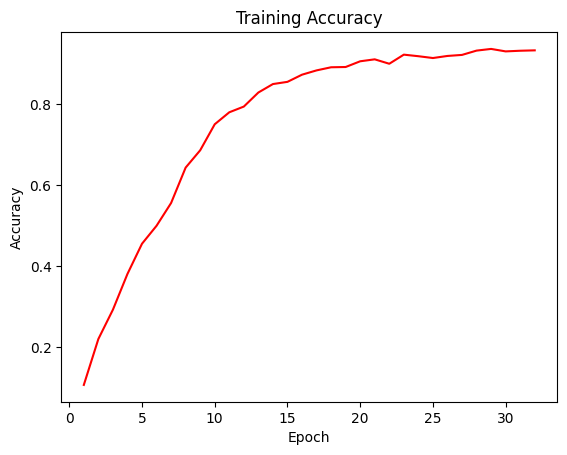

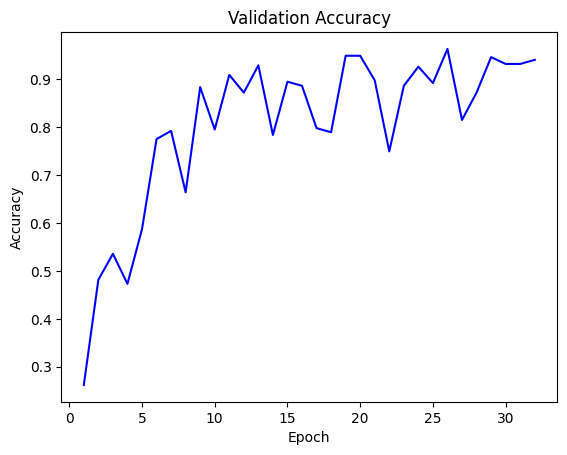

In [ ]:
num_epochs = len(training_history.history['val_accuracy'])
epochs = [i for i in range(1,num_epochs + 1)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(epochs, training_history.history['val_accuracy'], color='blue')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# **Testing Model**

In [ ]:
import cv2
image_path = '/content/drive/MyDrive/fruitsdata/test/apple/Image_3.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
result = cnn.predict(input_arr)

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[3.47214238e-34 0.00000000e+00 1.89782281e-18 0.00000000e+00
  2.32195156e-42 0.00000000e+00 0.00000000e+00 4.98722123e-42
  1.54310987e-41 3.99509977e-27 4.13963472e-32 0.00000000e+00
  1.31297585e-24 4.48415509e-44 7.06100283e-41 1.73918744e-36
  8.03882890e-41 1.63841225e-32 0.00000000e+00 0.00000000e+00
  2.01058461e-37 2.97466237e-40 0.00000000e+00 5.58460789e-27
  1.53272783e-35 0.00000000e+00 4.09639114e-38 1.53089643e-38
  9.22032567e-27 9.77433705e-41 0.00000000e+00 1.00000000e+00
  0.00000000e+00 2.75809589e-39 8.03750055e-22 7.12376690e-29]]


In [ ]:
#test_set.class_names
result_index = np.where(result[0] == max(result[0]))
print(result_index[0])

[31]


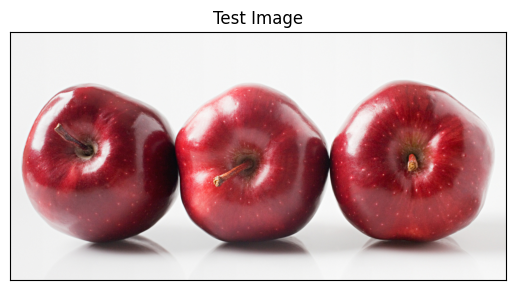

sweetcorn


In [ ]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()
print(training_set.class_names[result_index[0][0]])

# **Test by 10 img**

In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random


model = tf.keras.models.load_model('trained_model.keras')
test_folder = '/content/drive/MyDrive/fruitsdata/test'
class_folders = [f for f in os.listdir(test_folder) if os.path.isdir(os.path.join(test_folder, f))]


# Number of class folders to randomly select
num_classes_to_test = 10
# Number of images to randomly select per class
num_images_per_class = 2


selected_class_folders = random.sample(class_folders, min(num_classes_to_test, len(class_folders)))


correct_predictions = 0
total_predictions = 0


for class_folder in selected_class_folders:
    class_folder_path = os.path.join(test_folder, class_folder)
    image_files = [f for f in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, f))]

    # Check if there are any images in the class folder
    if not image_files:
        print(f"No image files found in {class_folder_path}")
        continue  # Skip to the next class folder


    selected_images = random.sample(image_files, min(num_images_per_class, len(image_files)))


    for image_file in selected_images:
        image_path = os.path.join(class_folder_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])

        # Make prediction
        result = model.predict(input_arr)
        result_index = np.where(result[0] == max(result[0]))
        predicted_class = training_set.class_names[result_index[0][0]]


        total_predictions += 1
        if predicted_class == class_folder:
            correct_predictions += 1

        # Calculate and print accuracy for this iteration
        accuracy = (correct_predictions / total_predictions) * 100
        print(f"Accuracy for this iteration: {accuracy:.2f}%")

        # Display image with prediction
        plt.imshow(img)
        plt.title(f'Prediction: {predicted_class}, Actual: {class_folder}')
        plt.xticks([])
        plt.yticks([])
        plt.show()

# Print overall accuracy
overall_accuracy = (correct_predictions / total_predictions) * 100
print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")

ValueError: File not found: filepath=trained_model.keras. Please ensure the file is an accessible `.keras` zip file.